In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fb=pd.read_csv("C:\\ksr\\data science\\DS_batch1\\datasets\\Fiberbits.csv")

In [3]:
fb.shape

(100000, 9)

In [4]:
fb.columns

Index(['active_cust', 'income', 'months_on_network', 'Num_complaints',
       'number_plan_changes', 'relocated', 'monthly_bill',
       'technical_issues_per_month', 'Speed_test_result'],
      dtype='object')

In [10]:
churn_rate=fb["active_cust"].value_counts()[1]/len(fb)*100
print("Churn rate *****",churn_rate)

Churn rate ***** 57.859


# divide the data into training and validation

In [12]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(fb,test_size=0.2,random_state=0)
print(train.shape,test.shape)

(80000, 9) (20000, 9)


In [14]:
print("overall_churnrate",fb["active_cust"].value_counts()[1]/len(fb)*100)
print("train_churnrate",train["active_cust"].value_counts()[1]/len(train)*100)
print("test_churnrate",test["active_cust"].value_counts()[1]/len(test)*100)

overall_churnrate 57.859
train_churnrate 57.942499999999995
test_churnrate 57.525000000000006


In [15]:
x_train=train.drop(["active_cust"],axis=1)
y_train=train["active_cust"]
x_test=test.drop(["active_cust"],axis=1)
y_test=test["active_cust"]

# Building the logistic regression model on train data

In [16]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(x_train,y_train)
lg.score(x_train,y_train)

C:\Users\Koti\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7688625

In [19]:
lg=LogisticRegression()
lg.fit(x_train,y_train)

C:\Users\Koti\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
help(LogisticRegression())

Help on LogisticRegression in module sklearn.linear_model.logistic object:

class LogisticRegression(sklearn.base.BaseEstimator, sklearn.linear_model.base.LinearClassifierMixin, sklearn.linear_model.base.SparseCoefMixin)
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |  
 |  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
 |  scheme if the 'multi_class' option is set to 'ovr', and uses the
 |  cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
 |  (Currently the 'multinomial' option is supported only by the 'lbfgs',
 |  'sag', 'saga' and 'newton-cg' solvers.)
 |  
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', 'sag', 'saga' and 'lbfgs' solvers. **Note
 |  that regularization is applied by default**. It can handle both dense
 |  and sparse input. Use C-ordered arrays or CSR matrices containing 64-bit
 |  floats for optimal performance; any other input format will be conver

In [21]:
lg.score(x_train,y_train)

0.7688625

In [22]:
lg.score(x_test,y_test)

0.76895

In [23]:
lg.intercept_

array([-8.83845193])

In [24]:
lg.coef_

array([[ 3.55498948e-04,  1.56182882e-02, -1.10411342e+00,
        -1.95271253e-01, -2.89404095e+00, -2.20573011e-03,
        -4.16816132e-01,  1.75447111e-01]])

In [25]:
list(zip(x_train.columns,lg.coef_[0]))

[('income', 0.00035549894806400744),
 ('months_on_network', 0.015618288180595841),
 ('Num_complaints', -1.1041134211275967),
 ('number_plan_changes', -0.19527125294593253),
 ('relocated', -2.8940409506050435),
 ('monthly_bill', -0.002205730110257388),
 ('technical_issues_per_month', -0.4168161317823659),
 ('Speed_test_result', 0.17544711060228288)]

In [26]:
train.head()

active_cust  income  months_on_network  Num_complaints  \
10382            1    1770                 59               4   
73171            1    1680                 69               4   
30938            1    1757                 61               4   
99310            1    1571                 87               4   
58959            0    1889                 49               4   

       number_plan_changes  relocated  monthly_bill  \
10382                    1          0           126   
73171                    2          0            46   
30938                    1          0           135   
99310                    1          0           168   
58959                    0          0            76   

       technical_issues_per_month  Speed_test_result  
10382                           4                 80  
73171                           4                 85  
30938                           4                 80  
99310                           4                 86  
58959                           4                 75

In [27]:
train["pred"]=lg.predict(x_train)

C:\Users\Koti\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [28]:
train.head()

active_cust  income  months_on_network  Num_complaints  \
10382            1    1770                 59               4   
73171            1    1680                 69               4   
30938            1    1757                 61               4   
99310            1    1571                 87               4   
58959            0    1889                 49               4   

       number_plan_changes  relocated  monthly_bill  \
10382                    1          0           126   
73171                    2          0            46   
30938                    1          0           135   
99310                    1          0           168   
58959                    0          0            76   

       technical_issues_per_month  Speed_test_result  pred  
10382                           4                 80     1  
73171                           4                 85     1  
30938                           4                 80     1  
99310                           4                 86     1  
58959                           4                 75     0

In [29]:
train["pred"].value_counts()

1    48797
0    31203
Name: pred, dtype: int64

In [30]:
lg.predict(x_train)

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [34]:
lg.predict_proba(x_train)[:,1]

array([0.5476345 , 0.76381826, 0.54930948, ..., 0.78025463, 0.68633649,
       0.45119365])

In [35]:
train["pred_prob"]=lg.predict_proba(x_train)[:,1]

C:\Users\Koti\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [36]:
train.head()

active_cust  income  months_on_network  Num_complaints  \
10382            1    1770                 59               4   
73171            1    1680                 69               4   
30938            1    1757                 61               4   
99310            1    1571                 87               4   
58959            0    1889                 49               4   

       number_plan_changes  relocated  monthly_bill  \
10382                    1          0           126   
73171                    2          0            46   
30938                    1          0           135   
99310                    1          0           168   
58959                    0          0            76   

       technical_issues_per_month  Speed_test_result  pred  pred_prob  
10382                           4                 80     1   0.547634  
73171                           4                 85     1   0.763818  
30938                           4                 80     1   0.549309  
99310                           4                 86     1   0.820204  
58959                           4                 75     0   0.378848

In [37]:
pd.crosstab(train["active_cust"],train["pred"])

pred             0      1
active_cust              
0            23179  10467
1             8024  38330

In [38]:
from sklearn.metrics import accuracy_score
accuracy_score(train["active_cust"],train["pred"])

0.7688625

In [39]:
from sklearn.metrics import  brier_score_loss
brier_score_loss(train["active_cust"],train["pred"])

0.2311375

In [41]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [42]:
from sklearn.metrics import *

In [43]:
precision_score(train["active_cust"],train["pred"])

0.7854991085517552

In [44]:
recall_score(train["active_cust"],train["pred"])

0.8268973551365578

In [45]:
f1_score(train["active_cust"],train["pred"])

0.8056667822723881

In [46]:
from sklearn.metrics import roc_auc_score

In [47]:
roc_auc_score(train["active_cust"],train["pred"])

0.7579026988486688

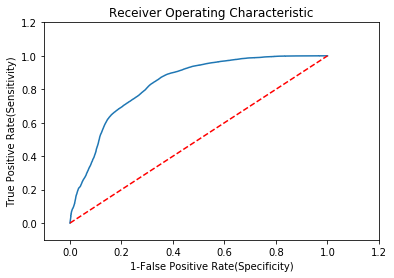

In [49]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

actual = train[['active_cust']]
predicted_values1=train[["pred_prob"]]
false_positive_rate, true_positive_rate, thresholds = roc_curve(actual, predicted_values1)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate(Sensitivity)')
plt.xlabel('1-False Positive Rate(Specificity)')
plt.show()


In [50]:
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.8307990349823997

In [51]:
pd.crosstab(train["active_cust"],train["pred"])

pred             0      1
active_cust              
0            23179  10467
1             8024  38330

In [52]:
train["pred_opt"]=np.where(train["pred_prob"]>0.17,1,0)

C:\Users\Koti\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [53]:
train["pred_opt"].value_counts()

1    71421
0     8579
Name: pred_opt, dtype: int64

In [54]:
pd.crosstab(train["active_cust"],train["pred_opt"])

pred_opt        0      1
active_cust             
0            8255  25391
1             324  46030

In [55]:
train.head()

active_cust  income  months_on_network  Num_complaints  \
10382            1    1770                 59               4   
73171            1    1680                 69               4   
30938            1    1757                 61               4   
99310            1    1571                 87               4   
58959            0    1889                 49               4   

       number_plan_changes  relocated  monthly_bill  \
10382                    1          0           126   
73171                    2          0            46   
30938                    1          0           135   
99310                    1          0           168   
58959                    0          0            76   

       technical_issues_per_month  Speed_test_result  pred  pred_prob  \
10382                           4                 80     1   0.547634   
73171                           4                 85     1   0.763818   
30938                           4                 80     1   0.549309   
99310                           4                 86     1   0.820204   
58959                           4                 75     0   0.378848   

       pred_opt  
10382         1  
73171         1  
30938         1  
99310         1  
58959         1

In [56]:
train1=train.sort_values("pred_prob",ascending=False)

In [58]:
train1.tail()

active_cust  income  months_on_network  Num_complaints  \
67329            0    1821                 55               6   
56894            0    1857                 51               5   
56895            0    1856                 51               5   
56896            0    1878                 49               5   
67328            0    1798                 56               6   

       number_plan_changes  relocated  monthly_bill  \
67329                    5          1           172   
56894                    9          1           178   
56895                    9          1           178   
56896                    9          1           172   
67328                    9          1           172   

       technical_issues_per_month  Speed_test_result  pred  pred_prob  \
67329                           4                 76     0   0.001443   
56894                           4                 74     0   0.001318   
56895                           4                 74     0   0.001317   
56896                           4                 74     0   0.001304   
67328                           4                 76     0   0.000666   

       pred_opt  
67329         0  
56894         0  
56895         0  
56896         0  
67328         0

In [59]:
train2=train1.reset_index()

In [62]:
train2["index1"]=train2.index

In [63]:
train2.head()

index  active_cust  income  months_on_network  Num_complaints  \
0  74388            1    4076                  0               4   
1  74300            1    4073                  0               4   
2  74485            1    4082                  0               4   
3  74398            1    4078                  0               4   
4  74218            1    4079                  0               4   

   number_plan_changes  relocated  monthly_bill  technical_issues_per_month  \
0                    0          0            82                           3   
1                    0          0            74                           3   
2                    0          0            91                           3   
3                    0          0            77                           3   
4                    0          0            79                           3   

   Speed_test_result  pred  pred_prob  pred_opt  index1  
0                332     1        1.0         1       0  
1                332     1        1.0         1       1  
2                332     1        1.0         1       2  
3                332     1        1.0         1       3  
4                332     1        1.0         1       4

In [64]:
def bin_cal(index1):
    if index1<8000:
        return "bin1"
    elif index1<16000:
        return "bin2"
    elif index1<24000:
        return "bin3"
    elif index1<32000:
        return "bin4"
    elif index1<40000:
        return "bin5"
    elif index1<48000:
        return "bin6"
    elif index1<56000:
        return "bin7"
    elif index1<64000:
        return "bin8"
    elif index1<72000:
        return "bin9"
    else:
        return "bin10"

In [65]:
train2["bin_flag"]=train2["index1"].apply(bin_cal)

In [66]:
train2["bin_flag"].value_counts()

bin4     8000
bin10    8000
bin5     8000
bin8     8000
bin3     8000
bin1     8000
bin7     8000
bin6     8000
bin2     8000
bin9     8000
Name: bin_flag, dtype: int64

In [68]:
abc1=pd.crosstab(train2["bin_flag"],train2["active_cust"])

In [69]:
abc1.to_excel("C:\\Users\\Koti\\Desktop\\DVS\\ks_stat.xlsx")